In [1]:
from pathlib import Path

# data manipulation libraries
import numpy as np
import xarray as xr
import fsspec

In [2]:
import warnings
warnings.filterwarnings("ignore")

FIG_DIR  = Path('figures')
DATA_DIR = Path('data')

In [3]:
# plotting libraries

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
from holoviews.operation import contours
import geoviews as gv
import geoviews.feature as gf

# Geoview Plot Options
gv.extension('matplotlib')
gv.output(size=200)

from IPython.core.display import HTML

# Center matplotlib's figures
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Funciones Útiles

In [4]:
def basic_stats(da, var_name, save=False):
    ind_var = ['time', 'lat', 'lon']
    
    
    df = da.max(dim=ind_var).to_dataframe().reset_index()
    df['min_'  + var_name] = da.min(dim=ind_var).values
    df['mean_' + var_name] = da.mean(dim=ind_var).values
    df['std_'  + var_name] = da.std(dim=ind_var).values
    
    df = df.rename({var_name: 'max_' + var_name}, axis=1)
    
    if save:
        path = DATA_DIR / (var_name + '.csv')
        df.to_csv(path)
    
    return df

def plot_stats(df, var_name, long_name, save=False):
    """
    Plot basic statistics from DataFrame that has levels.
    """
    fig, ax = plt.subplots(figsize=(15,10))
    
    df.plot(x='level', y=['mean_' + var_name, 
                          'max_'  + var_name, 
                          'min_'  + var_name], ax=ax);

    ax.fill_between(df.level, 
                    df['mean_' + var_name] - 2 * df['std_' + var_name], 
                    df['mean_' + var_name] + 2 * df['std_' + var_name],
                    color='b', alpha=0.15);
    
    title = long_name + ' per level'
    ax.set_title(title)

    if save:
        title = title.replace(' ', '_') + '.png'
        try:
            plt.savefig(FIG_DIR / title )
        except Exception as e:
            print(e)
            plt.savefig(title)
            
def faceted_groups_plot(da, groupped_by, title, save=False):
    """
    FacetPlot where each col is a group and each row is a level.
    
    Params:
    -------
    da  (xr.DataArray)   : Groupped DataArray with levels
    groupped_by (string) : Dimension used to group values
    title (string)       : Title for plot
    save  (bool)         : Whether to save the fig, will use the title
    
    Example:
    --------
    >>> anomalies_season = ds.groupby('time.season') - ds.groupby('time.season').mean('time')
    >>>
    >>> levels = [100, 500, 850]
    >>>
    >>> da = anomalies_season.sel(level=levels).groupby('season').mean(dim=['time']).compute()
    >>>
    >>> faceted_groups_plot(da=da, 
    ...                     groupped_by='season',
    ...                     title=f'Seasonal Mean Anomalies, level={levels}')
    ... <plot>
    """

    print(title)
    if 'level' in da.coords:
        p = da.plot.contourf(
             subplot_kws=dict(projection=ccrs.Orthographic(-80, -35), facecolor="gray"), 
             transform=ccrs.PlateCarree(), add_colorbar=False, robust=True,
             col=groupped_by, 
             row='level'
        )
        
    else:
        p = da.plot.contourf(
         subplot_kws=dict(projection=ccrs.Orthographic(-80, -35), facecolor="gray"), 
         transform=ccrs.PlateCarree(), add_colorbar=False, robust=True,
         col=groupped_by, col_wrap=4, 
    )

    axes_iter = p.axes.flat
    
    for ax in axes_iter:
        ax.coastlines()
        ax.gridlines()



    plt.tight_layout()
    plt.draw()

    if save:
        title = title.replace(', ', '_') + '.png'
        
        try:
            plt.savefig(FIG_DIR / title)
        except Exception as e:
            print(e)
            plt.savefig(title)

    plt.show()
    
def cartopy_world_plot(region_da, title, time_sel=0, level_sel=False, center=(-75, -20), extent=None, save=False):
    
    if type(level_sel) is int:
        da = region_da.isel(level=level_sel)
    else:
        da = region_da
        
    plt.figure(figsize=(15,7))
    
    ax = plt.axes(projection=ccrs.Orthographic(*center))
    
    ax.set_title(title)
    
    if extent is not None:
        print('asda')
        ax.set_extent(extent,  crs=ccrs.PlateCarree())
        
    da.isel(time=time_sel).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
    
    ax.set_global(); ax.coastlines();
    plt.show()
    
    if save:
        title = title.replace(', ', '_') + '.png'
        
        try:
            plt.savefig(FIG_DIR / title)
        except Exception as e:
            print(e)
            plt.savefig(title)

    plt.show()
        

def geoview_flat_plot(region_da, var_name, time_sel=0, level_sel=False, wide_chile=True):
    
    if type(level_sel) is int:
        da = region_da.isel(level=level_sel)
    else:
        da = region_da
    
    gv_ds = gv.Dataset(da.isel(time=time_sel))
    plot = gv_ds.to(gv.Image,  ['lon', 'lat'], var_name, 'time').opts(cmap='viridis', 
                                                                  colorbar=True)
    
    extras = []
    if wide_chile:
        easter_island_text = gv.Text(-104.360481, -24.104671, 'Easter Island').opts(color='white')
        easter_island_point = gv.Points([(-109.360481, -27.104671)]).opts(color='red')

        easter = easter_island_point * easter_island_text

        falkland_islands_text = gv.Text(-49.563412, -56.820557, 'Falklands').opts(color='white')
        falkland_islands_point = gv.Points([(-51.563412, -59.820557)]).opts(color='red')

        falkland = falkland_islands_point * falkland_islands_text
        
        extras.append(easter * falkland)
    
    plot = contours(plot, filled=True, overlaid=True)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        final_plot = plot * gf.coastline
        for extra in extras:
            final_plot *= extra
        gv.output(final_plot)

def get_lat_name(ds):
    for lat_name in ['lat', 'latitude']:
        if lat_name in ds.coords:
            return lat_name
    raise RuntimeError("Couldn't find a latitude coordinate")

def global_mean(ds):
    lat = ds[get_lat_name(ds)]
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

# Exploración de Datos


In [5]:
ds = xr.open_zarr(fsspec.get_mapper('gcs://weather-bench/region_zarr/'), consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (lat: 12, level: 13, lon: 14, time: 350640)
Coordinates:
  * lat        (lat) float64 -70.31 -64.69 -59.06 ... -19.69 -14.06 -8.438
  * level      (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon        (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    lat2d      (lat, lon) float64 dask.array<chunksize=(12, 14), meta=np.ndarray>
    lon2d      (lat, lon) float64 dask.array<chunksize=(12, 14), meta=np.ndarray>
    lsm        (lat, lon) float32 dask.array<chunksize=(12, 14), meta=np.ndarray>
    orography  (lat, lon) float32 dask.array<chunksize=(12, 14), meta=np.ndarray>
    pv         (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
    q          (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
    r          (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
    slt        (lat, lon) float32 dask.array<chunksize=(12, 14), meta=np.ndarray>
    t          (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(43830, 2, 4), meta=np.ndarray>
    tcc        (time, lat, lon) float32 dask.array<chunksize=(43830, 2, 4), meta=np.ndarray>
    u10        (time, lat, lon) float32 dask.array<chunksize=(43830, 2, 4), meta=np.ndarray>
    v10        (time, lat, lon) float32 dask.array<chunksize=(43830, 2, 4), meta=np.ndarray>
    vo         (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
    z          (time, level, lat, lon) float32 dask.array<chunksize=(43830, 2, 3, 4), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-08 20:51:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

**Recuerdo de latitud - longitud:**

![lat_lon](https://s3.us-east-2.amazonaws.com/journeynorth.org/images/graphics/mclass/Lat_Long.gif "lat_lon")

## Región: Chile + Océano Pacífico

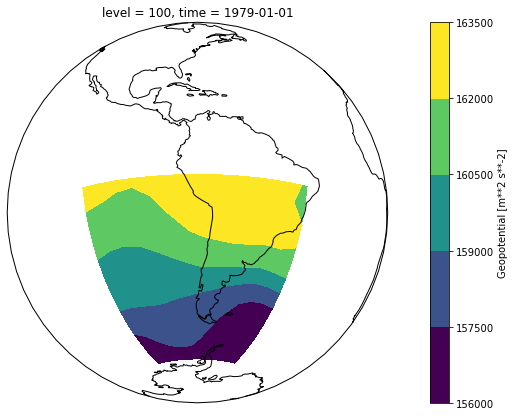

In [6]:
cartopy_world_plot(ds.z, title='', level_sel=1)
# geoview_flat_plot(ds.z, 'z', level_sel=1)

In [ ]:
# geoview_flat_plot(region_da=ds.t2m, var_name='t2m')
dataset = gv.Dataset(ds.t2m, vdims='t2m')
geo_dims = ['lon', 'lat']

plot = (dataset.to(gv.Image, geo_dims).opts(cmap='viridis',colorbar=True))[::20, ::20]

extras = []
easter_island_text = gv.Text(-104.360481, -24.104671, 'Easter Island').opts(color='white')
easter_island_point = gv.Points([(-109.360481, -27.104671)]).opts(color='red')
easter = easter_island_point * easter_island_text

falkland_islands_text = gv.Text(-49.563412, -56.820557, 'Falklands').opts(color='white')
falkland_islands_point = gv.Points([(-51.563412, -59.820557)]).opts(color='red')
falkland = falkland_islands_point * falkland_islands_text

extras.append(easter * falkland)

final_plot = plot * gf.coastline
for extra in extras:
    final_plot *= extra
gv.output(final_plot)

## Niveles 

- 13 Niveles:
    + 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000 hPa
    
    
- La presión al nivel del mar es de aproximadamente 1000 hPa y **disminuye** aproximadamente de manera exponencial con la altura. 850 hPa está a unos 1,5 km de altura. 500 hPa está a unos 5,5 km de altura. Si la presión de la superficie es menor que un nivel de presión dado, por ejemplo a grandes altitudes, los valores del nivel de presión se interpolan.


- Los niveles de presión seleccionados contienen los siete niveles de presión que se utilizan comúnmente para la salida en 3D por los modelos climáticos en el Proyecto de Intercomparación de Modelos Acoplados Fase 6 del CMIP6



In [10]:
df_means = global_mean(ds.resample(time='1M').mean())[['t2m', 't', 'z']].to_dataframe().reset_index()

df_means[['t2m', 't', 'z']] = (df_means[['t2m', 't', 'z']] - df_means[['t2m', 't', 'z']].mean()) / df_means[['t2m', 't', 'z']].std()

In [11]:
df_means 

time       t2m         t         z
0   1979-01-31  1.258849  1.485960  1.370763
1   1979-02-28  1.418261  1.442289  1.454890
2   1979-03-31  1.093087  1.037094  1.223281
3   1979-04-30  0.387880  0.426572  0.120489
4   1979-05-31 -0.292581 -0.187943 -0.296176
..         ...       ...       ...       ...
475 2018-08-31 -1.304931 -1.303424 -1.305586
476 2018-09-30 -0.887476 -1.111602 -1.191501
477 2018-10-31 -0.416682 -0.544831 -0.267949
478 2018-11-30  0.228847  0.540241  0.117858
479 2018-12-31  0.854461  0.913033  0.875274

[480 rows x 4 columns]

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

sns.lineplot(data=df_means, x='time', y='z', color="b", ax=ax[0])

sns.lineplot(data=df_means, x='time', y='t', color="b", ax=ax[1])

sns.lineplot(data=df_means, x='time', y='t2m',  color="g", ax=ax[2])

## Exploración Variables Esenciales

- Geopotencial, $Z$
- Temperatura, $T$
- Temperatura a 2 metros, $T2m$

### 1. Geopotencial x Niveles

El geopotencial es el potencial del campo gravitatorio de la Tierra. Esencial para los Modelos de Circulación General (ecuaciones dinámicas del clima).

Por comodidad se suele definir como el negativo de la energía potencial, de modo que el vector de gravedad se obtiene como el gradiente de este potencial, sin la negación. 


Recuerdo de unidades:

- Energia potencial: $m · g · h$ = $m · m/s^2  · 1 = m^2/s^2$


In [13]:
z = ds['z']
z

<xarray.DataArray 'z' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<zarr, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(43830, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:      Geopotential
    standard_name:  geopotential
    units:          m**2 s**-2

#### Rango de $Z$ y distribución

In [17]:
df = basic_stats(z, 'z', save=True)
df.head()

level          max_z          min_z         mean_z        std_z
0     50  205326.500000  177141.687500  199568.484375  4767.900391
1    100  164440.906250  139401.343750  158055.375000  4688.270020
2    150  141369.234375  116642.070312  133653.296875  5084.731445
3    200  123483.093750  100085.640625  115937.656250  5133.643555
4    250  108791.843750   86887.054688  101879.328125  4897.586914

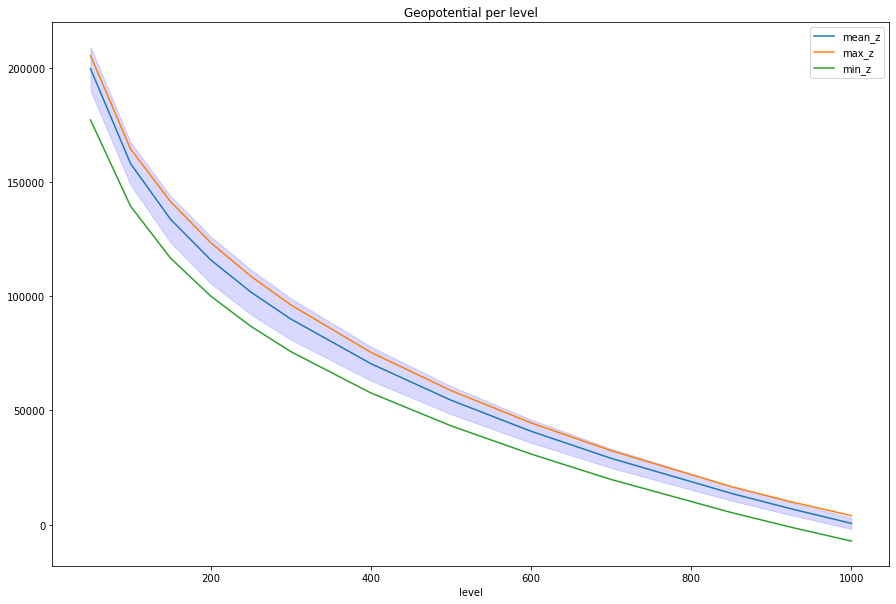

In [18]:
plot_stats(df, 'z', long_name=z.long_name, save=True)

#### Daily, Monthly, Seasonal Means: Climatologies

In [19]:
z_season_mean = z.groupby('time.season').mean('time')
z_season_std  = z.groupby('time.season').std('time')

z_month_mean = z.groupby('time.month').mean('time')
z_month_std  = z.groupby('time.month').std('time')

In [20]:
anomalies_month = z.groupby('time.month') - z_month_mean
anomalies_month

<xarray.DataArray 'z' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<getitem, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(744, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

Monthly Mean Anomalies, level=[100, 500, 850]


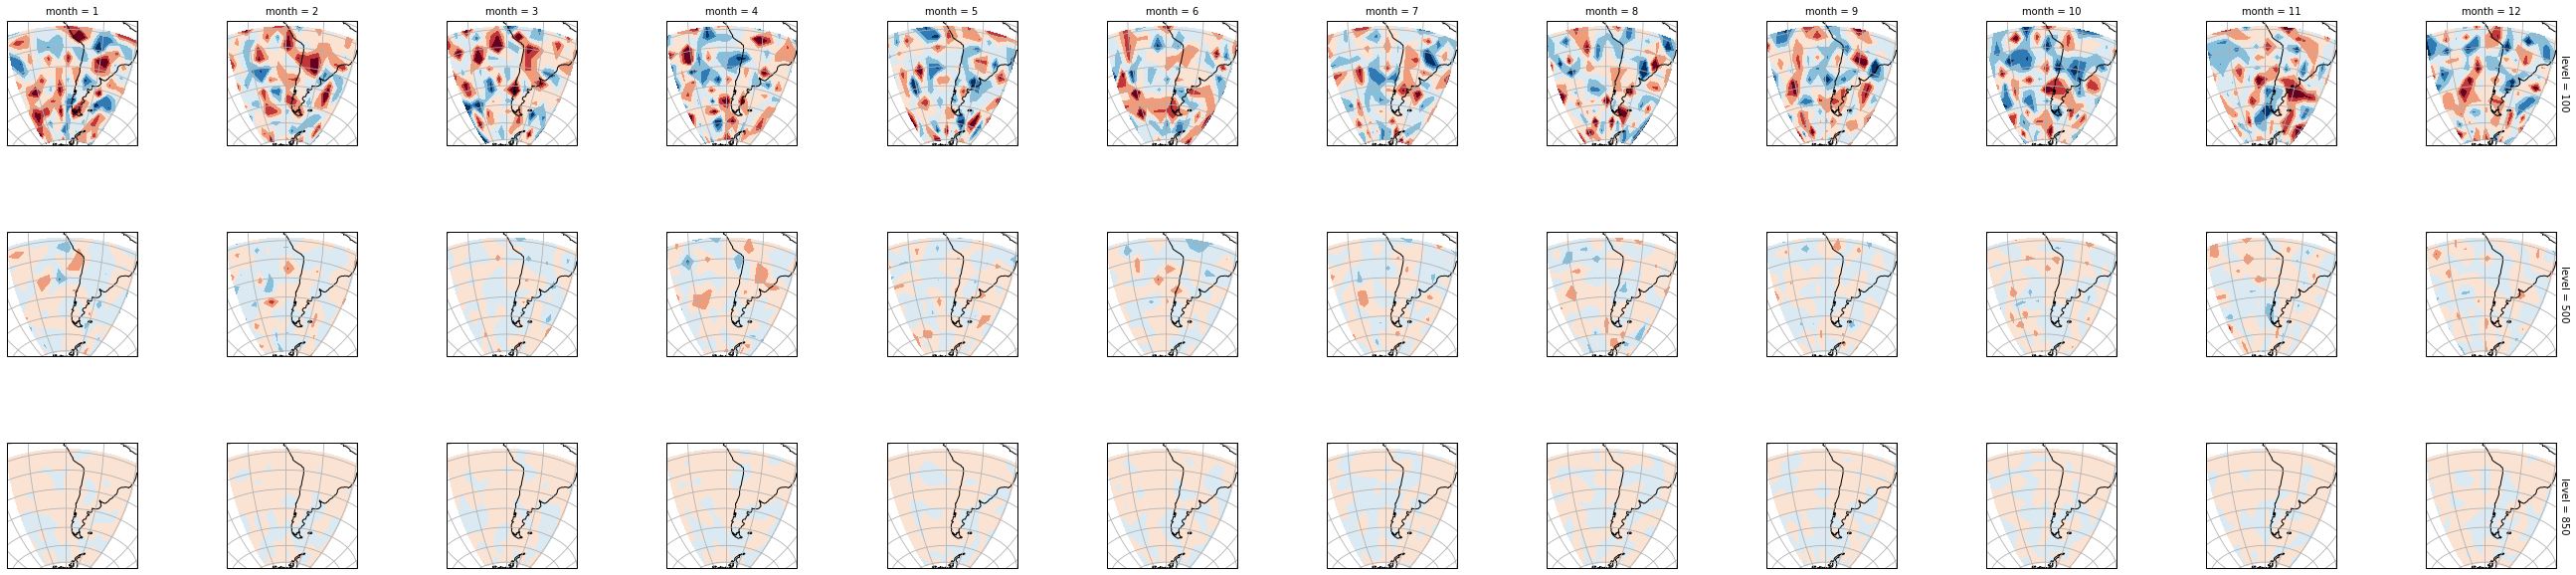

In [21]:
levels = [100, 500, 850]

da = anomalies_month.sel(level=levels).groupby('month').mean(dim=['time']).compute()

title = f'Monthly Mean Anomalies, level={levels}'

faceted_groups_plot(da, 'month', title, save=True)

In [22]:
anomalies_season = z.groupby('time.season') - z_season_mean
anomalies_season

<xarray.DataArray 'z' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<getitem, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(2208, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
    season   (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

Seasonal Mean Anomalies, level=[100, 500, 850]


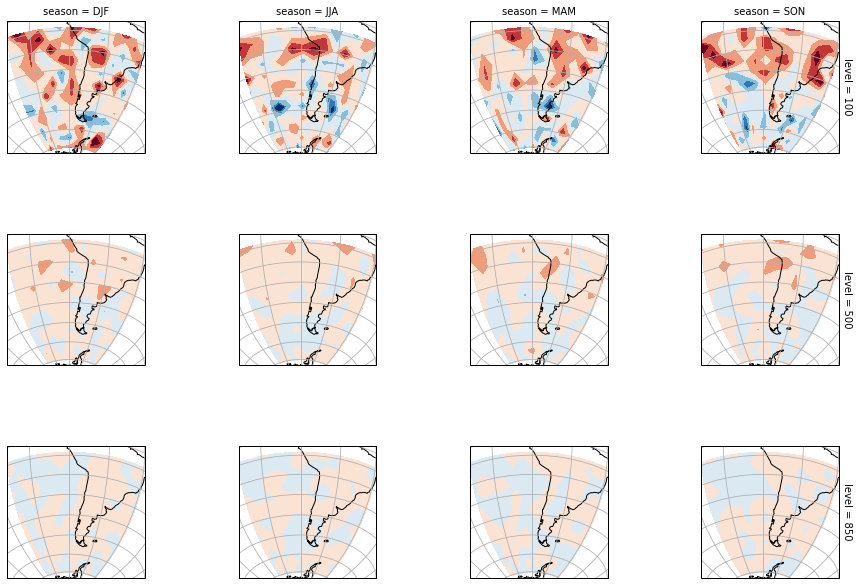

In [23]:
levels = [100, 500, 850]

da = anomalies_season.sel(level=levels).groupby('season').mean(dim=['time']).compute()

title = f'Seasonal Mean Anomalies, level={levels}'

faceted_groups_plot(da, 'season', title, save=True)

### 2. Temperatura x Niveles

In [24]:
t = ds['t']
t

<xarray.DataArray 't' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<zarr, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(43830, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:      Temperature
    standard_name:  air_temperature
    units:          K

#### Rango de $T$ y distribución

In [25]:
df = basic_stats(t, 't', save=True)
df.head()

level       max_t       min_t      mean_t      std_t
0     50  253.301666  173.987305  211.459824   8.593836
1    100  244.781845  174.301437  207.504852  10.645928
2    150  240.612808  181.117661  212.346542   7.701759
3    200  241.834793  187.687561  216.886658   6.357095
4    250  246.350632  194.098862  222.597672   7.498000

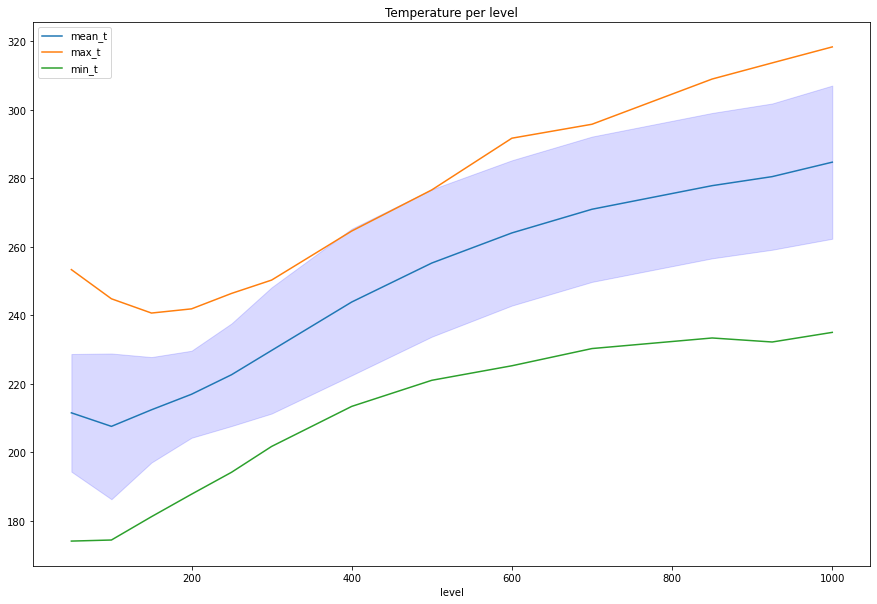

In [26]:
plot_stats(df, 't', long_name=t.long_name, save=True)

#### Daily, Monthly, Seasonal Means

In [27]:
t_season_mean = t.groupby('time.season').mean('time')
t_season_std  = t.groupby('time.season').std('time')

t_month_mean = t.groupby('time.month').mean('time')
t_month_std  = t.groupby('time.month').std('time')

In [28]:
anomalies_month = t.groupby('time.month') - t_month_mean
anomalies_month

<xarray.DataArray 't' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<getitem, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(744, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

Monthly Mean Anomalies, level=[100, 500, 850]


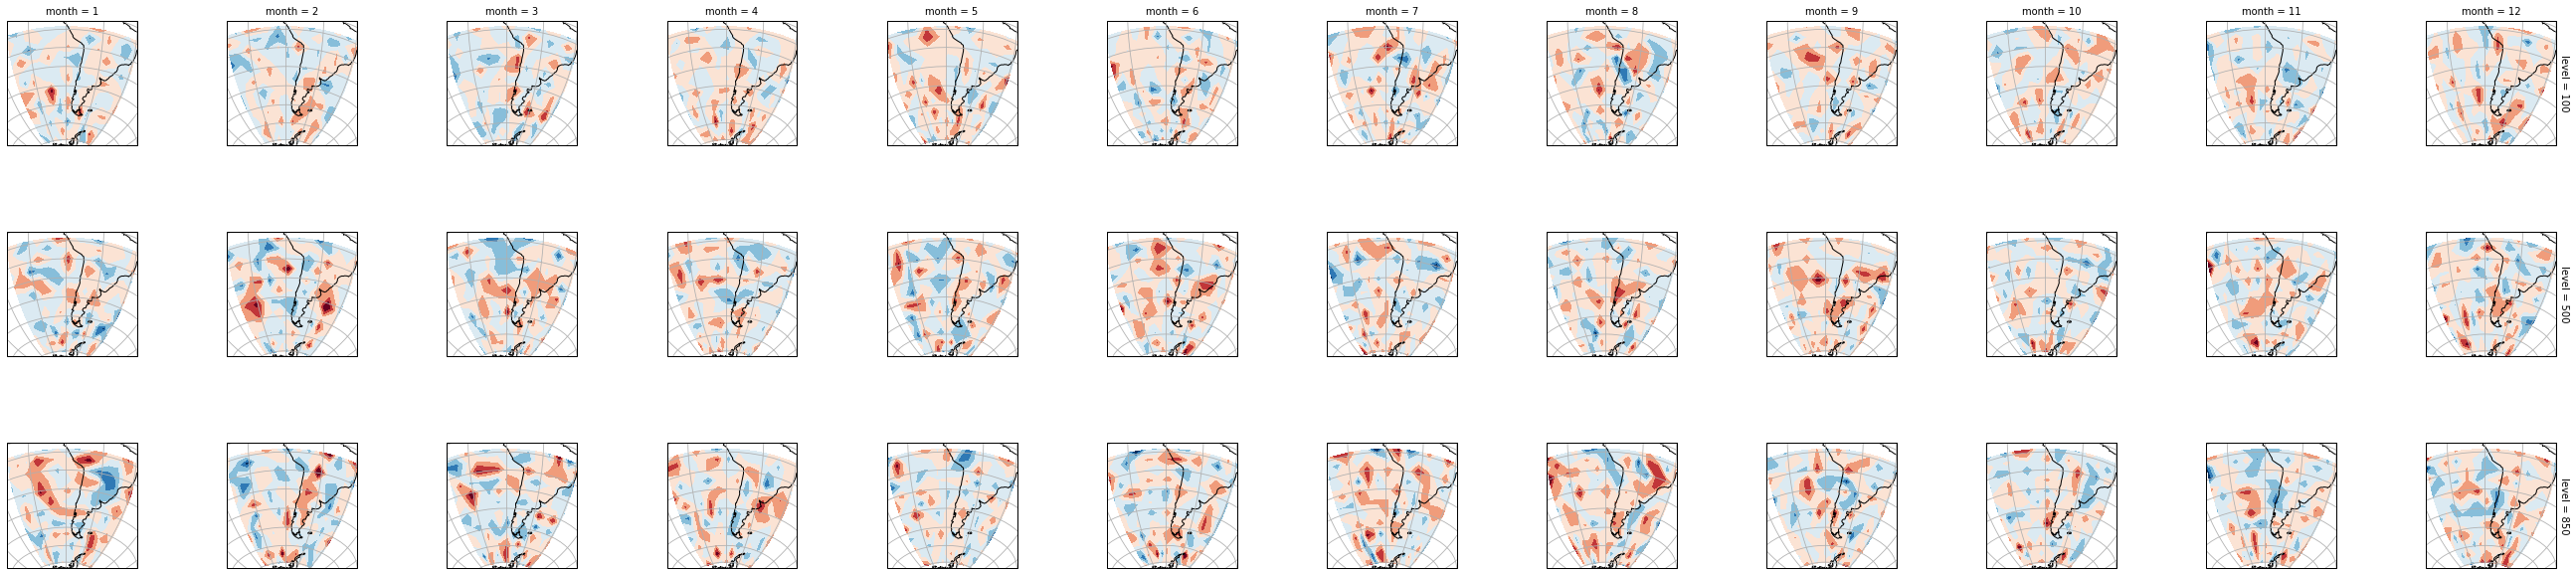

In [29]:
levels = [100, 500, 850]

da = anomalies_month.sel(level=levels).groupby('month').mean(dim=['time']).compute()

title = f'Monthly Mean Anomalies, level={levels}'

faceted_groups_plot(da, 'month', title, save=True)

In [30]:
anomalies_season = t.groupby('time.season') - t_season_mean
anomalies_season

<xarray.DataArray 't' (time: 350640, level: 13, lat: 12, lon: 14)>
dask.array<getitem, shape=(350640, 13, 12, 14), dtype=float32, chunksize=(2208, 2, 3, 4), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
    season   (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

Seasonal Mean Anomalies, level=[100, 500, 850]


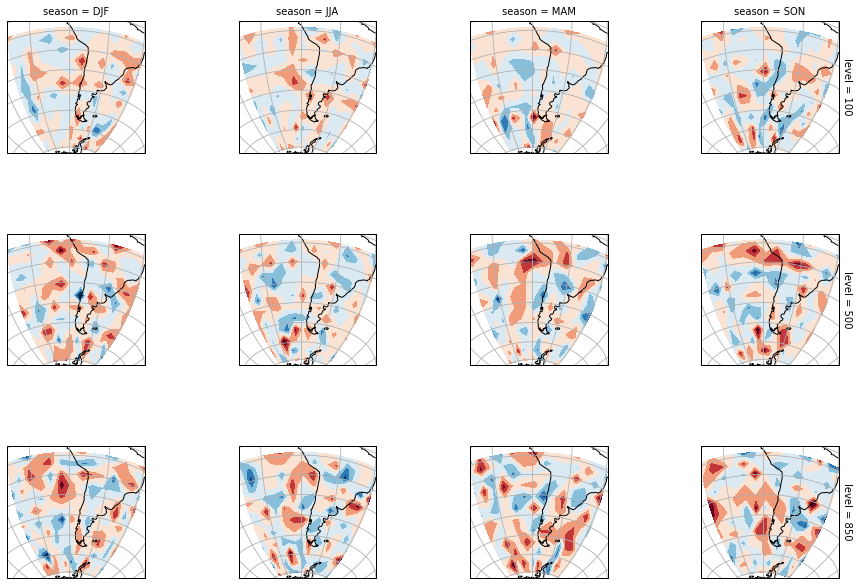

In [31]:
levels = [100, 500, 850]

da = anomalies_season.sel(level=levels).groupby('season').mean(dim=['time']).compute()

title = f'Seasonal Mean Anomalies, level={levels}'

faceted_groups_plot(da, 'season', title, save=True)

### 3. Temperatura a 2 metros

#### Rango de $T2m$ y distribución

In [32]:
t2m = ds['t2m']
t2m

<xarray.DataArray 't2m' (time: 350640, lat: 12, lon: 14)>
dask.array<zarr, shape=(350640, 12, 14), dtype=float32, chunksize=(43830, 2, 4), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -70.31 -64.69 -59.06 -53.44 ... -19.69 -14.06 -8.438
  * lon      (lon) float64 247.5 253.1 258.8 264.4 ... 303.8 309.4 315.0 320.6
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:  2 metre temperature
    units:      K

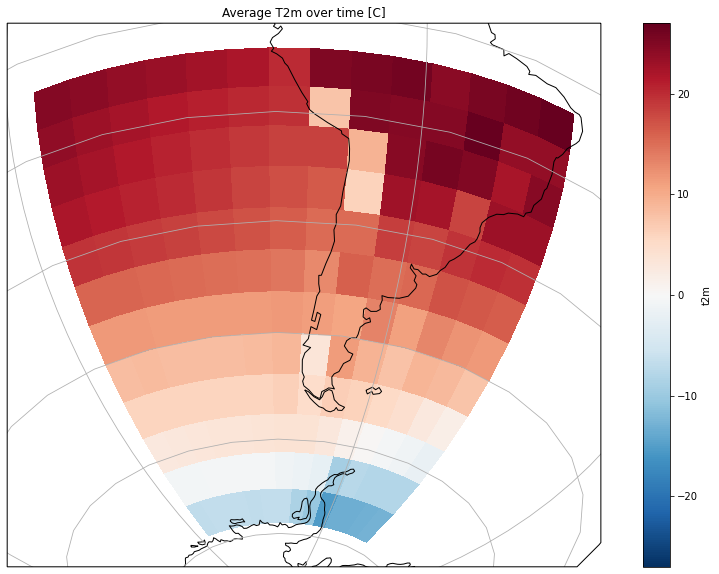

In [33]:
f = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Orthographic(-80, -35))

p = (t2m.mean(dim='time') - 273.15).plot(ax=ax, transform=ccrs.PlateCarree())

ax.set_title('Average T2m over time [C]')
p.axes.coastlines()
p.axes.gridlines()

if True:
    title = t2m.long_name.replace(' ', '_') + '_time_mean.png'
    plt.savefig(FIG_DIR/ title)

plt.draw()

#### Daily, Monthly, Seasonal Means

In [34]:
t2m_season_mean = t2m.groupby('time.season').mean('time')
t2m_season_std  = t2m.groupby('time.season').std('time')

t2m_month_mean = t2m.groupby('time.month').mean('time')
t2m_month_std  = t2m.groupby('time.month').std('time')

anomalies_month = t2m.groupby('time.month') - t2m_month_mean
anomalies_season = t2m.groupby('time.season') - t2m_season_mean

Monthly Mean Anomalies


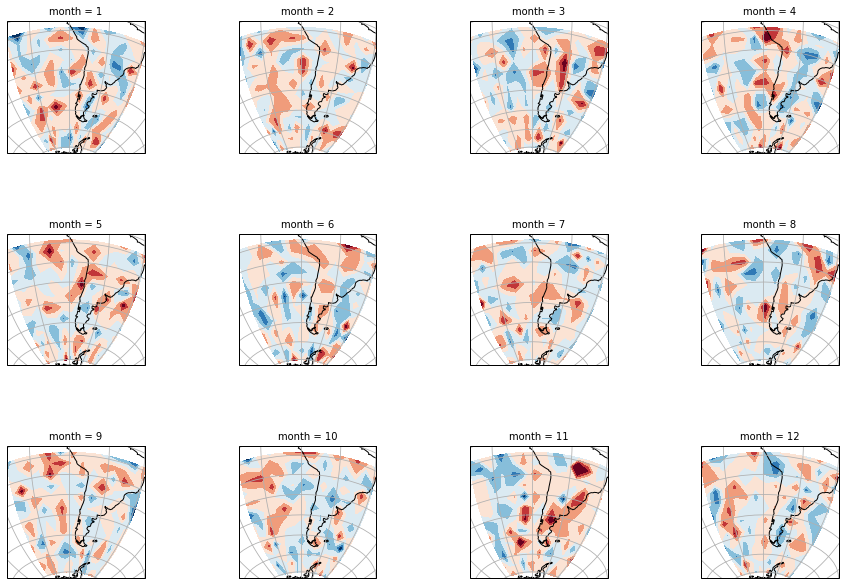

In [35]:
da = anomalies_month.groupby('month').mean(dim=['time']).compute()

title = f'Monthly Mean Anomalies'

faceted_groups_plot(da, 'month', title, save=True)

Seasonal Mean Anomalies


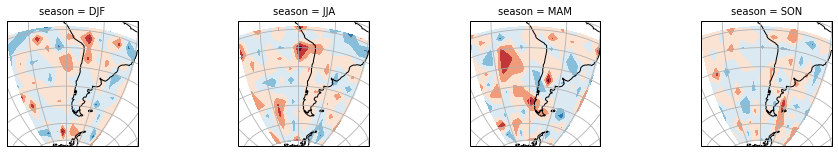

In [36]:
da = anomalies_season.groupby('season').mean(dim=['time']).compute()

title = f'Seasonal Mean Anomalies'

faceted_groups_plot(da, 'season', title, save=True)

## PCA & K-Means?

- TimeSeriesKMeans : tslearn package, http://www.jmlr.org/papers/volume21/20-091/20-091.pdf
- TimeSeries and PCA: Singular spectrum
    http://karthur.org/2017/learning-for-time-series-ssa-vs-pca.html